In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = load_breast_cancer()

In [4]:
X, y = data.data, data.target

In [5]:
X = scale(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
cross_val_scores = []

neighbors = np.arange(1, 15, 2)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))

print("Best CV score: {:.3f}".format(np.max(cross_val_scores)))

best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("Best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

Best CV score: 0.967
Best n_neighbors: 3
test-set score: 0.979


Text(0, 0.5, 'Validation score')

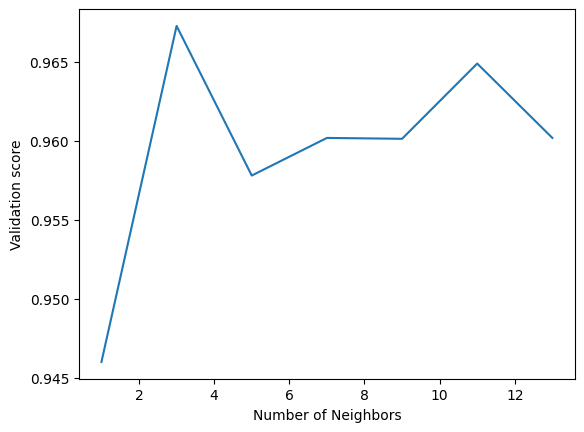

In [15]:
plt.plot(neighbors, cross_val_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel("Validation score")